In [1]:
import pandas as pd
from gemelli.rpca import feature_correlation_table
from biom import load_table
import numpy as np
import glob
from skbio import OrdinationResults
from biom import load_table

import matplotlib.patches as mpatches
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import tables

In [21]:
ord_joint = OrdinationResults.read('../results/joint-rpca/joint_ord.txt')
ord_joint_feats = ord_joint.features.copy()
axis_use = 1 # use PC2
# import tables data 
metadata_subset = pd.read_csv('../network/split-matched-data/metadata.tsv', sep='\t', index_col=0)
tables = {}
for table_ in glob.glob('../network/split-matched-data/*.biom'):
    if '16S' in table_:
        continue
    if 'gene.biom' in table_:
        continue
    bt_tmp = load_table(table_)
    bt_tmp_df = pd.DataFrame(bt_tmp.matrix_data.toarray(), bt_tmp.ids('observation'), bt_tmp.ids())
    bt_tmp_df = bt_tmp_df[metadata_subset.index]
    id_set = set(ord_joint_feats.index) & set(bt_tmp.ids('observation'))
    ord_joint_feats_tmp = ord_joint_feats.loc[list(id_set), :]
    ord_joint_feats_tmp = ord_joint_feats_tmp.sort_values(by=axis_use)
    tables[table_.split('/')[-1].split('.')[0]] = [bt_tmp, bt_tmp_df, ord_joint_feats_tmp]
tables.keys()

dict_keys(['metabolite', 'mag', '18S', 'gene_module', 'metabolomics'])

In [22]:
# annots for tables
taxonomy_18s = pd.read_csv('../network/annotations/18S_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_18s = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_18s.index, taxonomy_18s.Taxon.values)}
taxonomy_18s = pd.DataFrame(taxonomy_18s).T
taxonomy_18s_nosp = taxonomy_18s.drop([' s'], axis=1)

taxonomy_mag = pd.read_csv('../network/annotations/MAG_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_mag = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_mag.index, taxonomy_mag.Taxon.values)}
taxonomy_mag = pd.DataFrame(taxonomy_mag).T
taxonomy_mag[taxonomy_mag == ''] = np.nan

metab_ids = pd.read_excel('../network/metabolite_formulas.xlsx', index_col=0)
metab_ids.index = ['metab_' + str(x) for x in metab_ids.index]
metab_ids_class = metab_ids.dropna(subset=['most specific class'])

In [24]:
bt_tmp, df_tmp, ord_tmp = tables['metabolite']
keep_metab = set(metab_ids_class.index) & set(bt_tmp.ids('observation'))
bt_tmp = bt_tmp.filter(keep_metab, axis='observation')
df_tmp = df_tmp.loc[list(keep_metab), :]
ord_tmp = ord_tmp.loc[list(keep_metab), :].sort_values(by=axis_use)
tables['metabolite'] = [bt_tmp, df_tmp, ord_tmp]

In [25]:
feature_feature_correlation = feature_correlation_table(ord_joint)
feature_feature_correlation.head(5)

featureid,metab_1,metab_2,metab_3,metab_4,metab_5,metab_6,metab_9,metab_10,metab_11,metab_12,...,sp|Q4Z9G3|PORTL_BPTWO_Probable_portal_protein;_XpXrXs,sp|Q52118|YMO3_PANSE_Uncharacterized_protein_in_mobD_3'region;_Xh,sp|Q5PLI4|DGCQ_SALPA_Probable_diguanylate_cyclase_DgcQ;_Xh,sp|Q5UQ90|YL532_MIMIV_Cytochrome_P450-like_protein_L532;_XhXs,sp|Q5UQG2|YL498_MIMIV_Probable_zinc-type_alcohol_dehydrogenase-like_protein_L498;_XhXs,sp|Q5UQI9|YR836_MIMIV_Uncharacterized_protein_R836;_Xu,sp|Q7VIN2|NPD_HELHP_NAD-dependent_protein_deacylase;_Xh,sp|Q8ZNY9|PRP1_SALTY_Serine/threonine-protein_phosphatase_1;_Xh,sp|Q93J06|LIP2_STRCO_Lipase_2;_Xh,sp|Q9USU3|FBH1_SCHPO_F-box_DNA_helicase_protein_1;_Xh
featureid,,,,,,,,,,,,,,,,,,,,,
metab_1,1.000000,0.786264,0.150529,0.987578,0.457097,0.388970,0.983118,-0.297537,-0.361983,-0.471167,...,-0.940052,0.157875,0.458837,0.021995,0.370629,-0.211256,0.553429,0.319917,0.655074,-0.712130
metab_2,0.786264,1.000000,-0.487082,0.700346,-0.029141,0.863183,0.669669,0.285259,0.244603,-0.556419,...,-0.758739,-0.072607,-0.124070,-0.372679,0.056913,0.010621,-0.024614,0.287963,0.534310,-0.917479
metab_3,0.150529,-0.487082,1.000000,0.277442,0.757798,-0.842336,0.307016,-0.916220,-0.907481,0.168312,...,-0.141265,0.431661,0.820238,0.673156,0.495716,-0.319214,0.793284,-0.061866,0.121688,0.411699
metab_4,0.987578,0.700346,0.277442,1.000000,0.585325,0.275285,0.994177,-0.399500,-0.496232,-0.508234,...,-0.920210,0.284076,0.571574,0.174251,0.495405,-0.318070,0.655555,0.219223,0.716264,-0.666057
metab_5,0.457097,-0.029141,0.757798,0.585325,1.000000,-0.421433,0.553314,-0.788397,-0.866741,-0.472491,...,-0.467451,0.850495,0.745388,0.822569,0.894448,-0.583279,0.742382,-0.365911,0.694562,-0.210594


# analysis


In [26]:
for modality, (_, table_, ranks_) in tables.items():
    print(modality, table_.shape, ranks_.shape)

metabolite (267, 374) (267, 4)
mag (257, 374) (257, 4)
18S (5473, 374) (5431, 4)
gene_module (377, 374) (377, 4)
metabolomics (2333, 374) (2333, 4)


In [27]:
# make each log-ratio based on axis
quantile_use = 0.1
features_used_all = {}
lr_cols = []
metadata_logratios = metadata_subset.copy()
for modality, (_, table_, ranks_) in tables.items():
    for i_ in range(1, 1500):
        num = ranks_.iloc[:i_, :].index
        den = ranks_.iloc[-i_:, :].index
        features_used_all[modality] = [num[:19], den[:19]]
        #features_used_all[modality] = [num[:i_], den[:i_]]
        lr_ = np.log(table_.loc[num, :].sum(0)) - np.log(table_.loc[den, :].sum(0))
        if (sum(np.isfinite(lr_)) / table_.shape[1]) >= 0.99:
            break
    print(modality)
    print(i_)
    print(sum(np.isfinite(lr_)) / table_.shape[1])
    lr_[~np.isfinite(lr_)] = np.nan
    metadata_logratios[modality + '_logratio'] = lr_
    lr_cols.append(modality + '_logratio')
    
#metadata_logratios

metabolite
212
1.0
mag
30
0.9946524064171123
18S
1499
0.9037433155080213
gene_module
18
1.0
metabolomics
12
0.9946524064171123


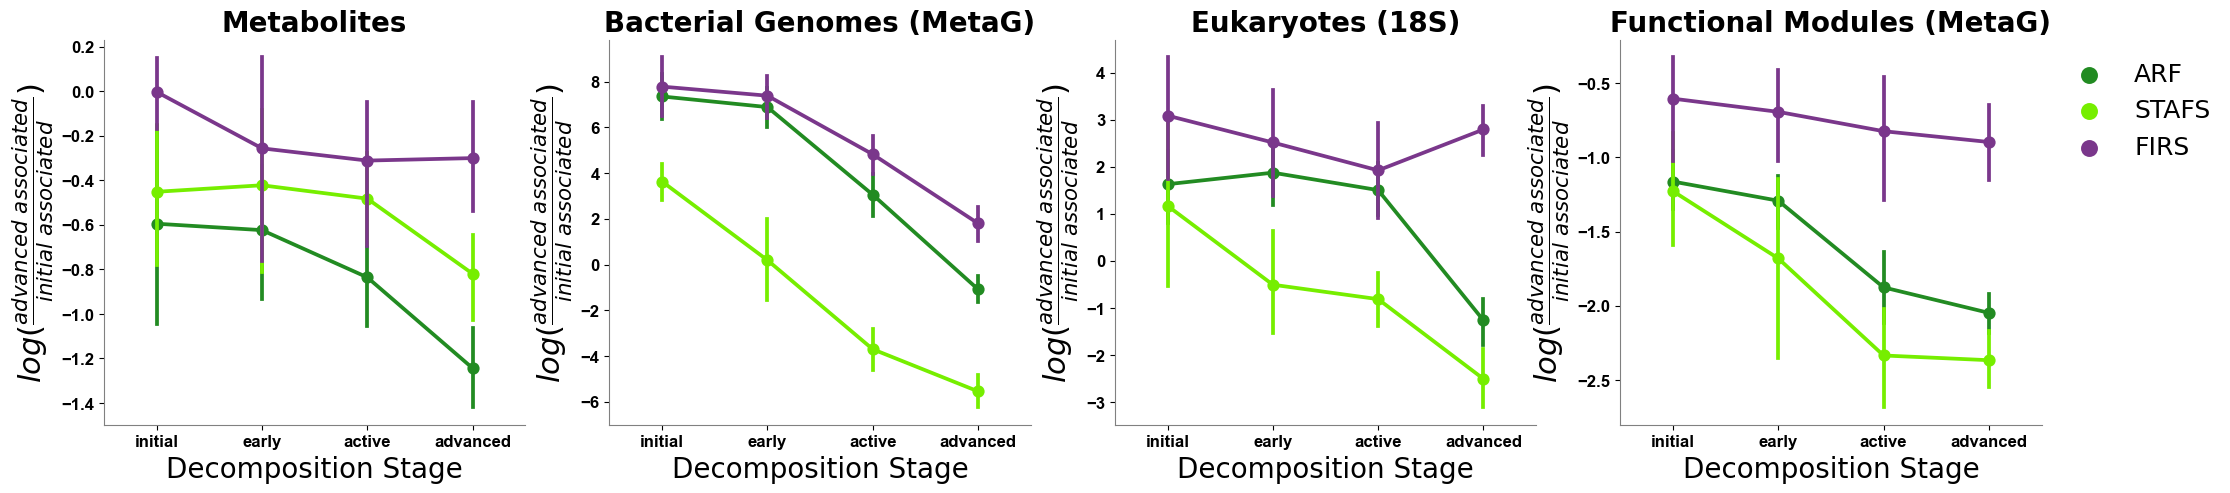

In [28]:
fig, axn = plt.subplots(1, 4, figsize=(5*5, 5))

titles_ =  {'mag_logratio':'Bacterial Genomes (MetaG)',
            '18S_logratio':'Eukaryotes (18S)',
            'gene_module_logratio':'Functional Modules (MetaG)',
            'metabolite_logratio':'Metabolites'}

palette=["#228b22","#76ee00","#7a378b"]

for ax, lr_ in zip(axn, lr_cols):

    #metadata_logratios[lr_] = -1*metadata_logratios[lr_]
    sns.pointplot(x='add_0c_group', y=lr_, hue='facility', 
                  hue_order = ['ARF', 'STAFS', 'FIRS'], palette=palette,
                  order = ['initial', 'early', 'active', 'advanced'],
                  data=metadata_logratios, ax=ax)
    ax.set_xlabel('Decomposition Stage', color='black', fontsize=20)
    ax.set_ylabel('$log(\\frac{advanced\,\,associated}{initial\,\,associated})$',
                  color='black', weight='bold', fontsize=22)
    ax.set_title(titles_[lr_], color='black', weight='bold', fontsize=20)

    # fix backround
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('grey')
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    ax.legend_.remove()

legend = ax.legend(loc=2, bbox_to_anchor=(1, 1), prop={'size':18}, title="",
                   fancybox=True, framealpha=.0, ncol=1, markerscale=1.5)
legend.get_title().set_fontsize('16')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)

# plt.savefig('../results/figures/rpca-log-ratios.png',
#             dpi=600, 
#             bbox_inches='tight',
#             edgecolor='none')
plt.show()

In [29]:
# make sure no overlap
{k_:set(v1) & set(v2) for k_, (v1, v2) in features_used_all.items()}

{'metabolite': set(),
 'mag': set(),
 '18S': set(),
 'gene_module': set(),
 'metabolomics': set()}

In [ ]:
#metadata_logratios.to_csv('../results/joint-rpca/metadata_w_log_ratios.csv')

# initial associated

In [ ]:
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v2)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]
feature_feature_correlation_subset.shape

(87, 87)

In [16]:
new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolite'][1].index:
            modality_map[ind_] = 'Metabolites'
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2,0DH:ubiquinone oxidoreductase mitochondria,"1,2-aminoalcohols",Acinetobacter (g),Acinetobacter baumannii B (s),Acinetobacter gerneri (s),Acinetobacter rudis (s),Adhesin protein transport system,Agaricomycotina ( ps),Angulamoeba ( g),Arginine/lysine/histidine/glutamine transport system,...,Vitreoscilla (g),Wohlfahrtiimonadaceae (f),metab 141,metab 1458,metab 156,metab 1885,metab 2163,metab 541,metab 679,metab 686
axis1,,,,,,,,,,,,,,,,,,,,,
0DH:ubiquinone oxidoreductase mitochondria,1.000000,-0.295125,0.740543,0.576367,0.598494,0.742242,0.859724,0.777081,0.719503,0.825483,...,0.695995,0.120709,0.895204,0.938210,0.706660,0.819412,0.782396,0.652014,0.823230,0.914588
"1,2-aminoalcohols",-0.295125,1.000000,-0.842441,-0.939238,-0.938405,-0.391894,-0.534664,-0.679350,0.276754,-0.334295,...,-0.100530,0.851999,-0.209601,-0.385860,-0.216575,-0.006673,0.097259,0.441716,-0.721459,-0.581207
Acinetobacter (g),0.740543,-0.842441,1.000000,0.973215,0.975802,0.752129,0.883577,0.816737,0.128697,0.734351,...,0.551674,-0.471017,0.598549,0.747922,0.582646,0.491610,0.425531,-0.004560,0.935170,0.889227
Acinetobacter baumannii B (s),0.576367,-0.939238,0.973215,1.000000,0.997721,0.623729,0.765196,0.771790,-0.046347,0.623374,...,0.390957,-0.650372,0.426448,0.599494,0.426012,0.289141,0.218277,-0.210043,0.862491,0.776267
Acinetobacter gerneri (s),0.598494,-0.938405,0.975802,0.997721,1.000000,0.620810,0.770130,0.808814,-0.007268,0.607208,...,0.376021,-0.650575,0.468756,0.636029,0.442128,0.306725,0.222168,-0.167486,0.885651,0.801702


In [17]:
#feature_feature_correlation_subset_relabel.to_csv('../results/joint-rpca/intial-associated-correlation.csv')

In [34]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.8]).values[0]) \
                         & (links['var1'] != links['var2'])]
# Keep self loops
#links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
#                          links.loc[ (links['var1'] == links['var2'])]], axis=0)

links_filtered.shape

(940, 3)

In [35]:
color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}

In [37]:
unique_feats = links_filtered.var1.unique()
feats_to_remove = []

for feat in unique_feats:
    if feat not in modality_map_label.keys():
        feats_to_remove.append(feat)

print(feats_to_remove)
links_filtered = links_filtered[~links_filtered['var1'].isin(feats_to_remove)]
links_filtered = links_filtered[~links_filtered['var2'].isin(feats_to_remove)]

['metab 141', 'metab 1458', 'metab 156', 'metab 1885', 'metab 2163', 'metab 541', 'metab 679', 'metab 686']


In [38]:
print(links_filtered.var1.nunique())
print(links_filtered.var2.nunique())
print(len(modality_map_label.keys()))

60
60
64


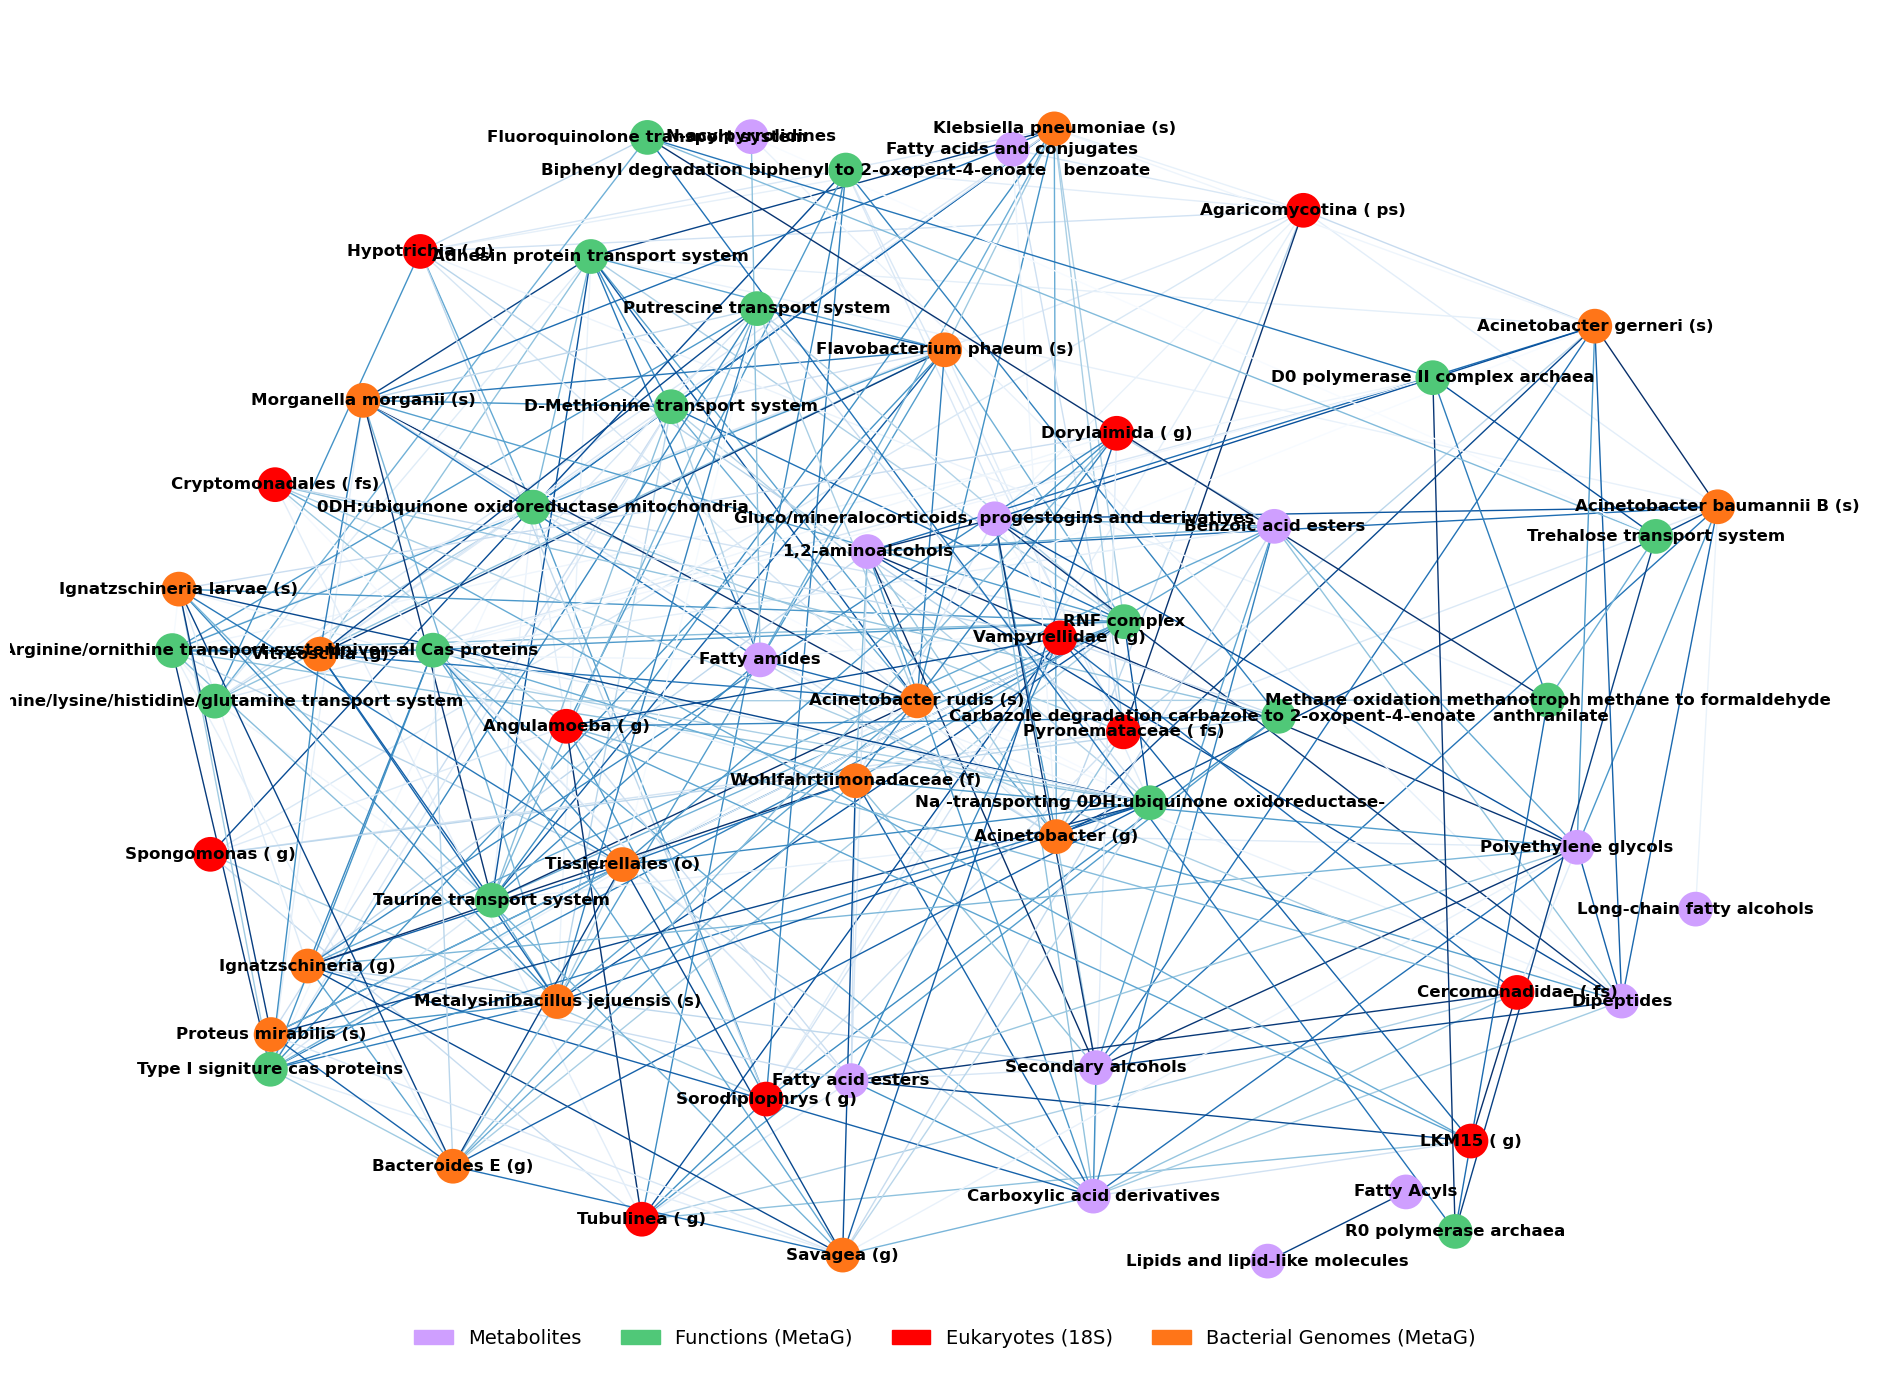

In [39]:
num_iterations = 20

for iteration in range(num_iterations):

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
    # Plot the network:
    values = range(links_filtered.shape[0])

    #pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G, k=1.8)

    fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

    y_off = 3

    nx.draw(G, with_labels=True,
            pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
            node_color=[color_map[modality_map_label[node[0]]]
                        for node in G.nodes(data=True)], 
            node_size=[assoc_map_label[node[0]]
                        for node in G.nodes(data=True)], 
            #node_size=400,
            edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                        for u, v in G.edges],
            edge_cmap= plt.cm.Blues,
            linewidths=5,
            width=1,
            font_size=12, font_weight='bold', ax=ax)

    handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
    legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
               prop={'size':14},
               title="",
               fancybox=True,
                        framealpha=.0,
               ncol=4, markerscale=1.5)
    legend.get_title().set_fontsize('16')
    # increase the line width in the legend 
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)

    plt.tight_layout()

    #plt.savefig(f'../results/figures/initial-network-{iteration}.png',
    #            dpi=600, 
    #            bbox_inches='tight',
    #            edgecolor='none')
    
    if iteration == 0:
        plt.show()
    else:
        plt.close()

# advanced associated

In [ ]:
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v1)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]
feature_feature_correlation_subset.shape

(84, 84)

In [ ]:

new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolomics'][1].index:
            modality_map[ind_] = 'Metabolites'
              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2,0DH:ubiquinone oxidoreductase mitochondria,Acinetobacter baumannii B (s),Acinetobacter rudis (s),Adhesin protein transport system,Amino acids,Animalia ( k),Apiotrichum ( g),Arginine/lysine/histidine/glutamine transport system,Arginine/ornithine transport system,Arylsulfates,...,Wohlfahrtiimonas chitiniclastica (s),Yarrowia ( g),metab 141,metab 1458,metab 156,metab 1885,metab 2163,metab 541,metab 679,metab 686
axis1,,,,,,,,,,,,,,,,,,,,,
0DH:ubiquinone oxidoreductase mitochondria,1.000000,0.576367,0.742242,0.859724,0.887977,0.708385,0.541068,0.825483,0.767116,0.291725,...,0.761582,0.372009,0.895204,0.938210,0.706660,0.819412,0.782396,0.652014,0.823230,0.914588
Acinetobacter baumannii B (s),0.576367,1.000000,0.623729,0.765196,0.712159,0.215702,-0.225484,0.623374,0.114437,-0.288199,...,0.353385,-0.190947,0.426448,0.599494,0.426012,0.289141,0.218277,-0.210043,0.862491,0.776267
Acinetobacter rudis (s),0.742242,0.623729,1.000000,0.960783,0.548995,0.644212,0.184576,0.686774,0.702577,0.561366,...,0.929695,0.486237,0.713008,0.754810,0.933673,0.873861,0.853295,0.233290,0.794593,0.822860
Adhesin protein transport system,0.859724,0.765196,0.960783,1.000000,0.745614,0.628499,0.200085,0.776419,0.662107,0.361233,...,0.865757,0.353197,0.789364,0.863430,0.872673,0.832155,0.788383,0.279761,0.914352,0.936425
Amino acids,0.887977,0.712159,0.548995,0.745614,1.000000,0.352470,0.206081,0.614785,0.388330,-0.121746,...,0.523772,-0.027275,0.852141,0.926031,0.540249,0.572363,0.449727,0.496693,0.898795,0.923640


In [ ]:
feature_feature_correlation_subset_relabel.to_csv('../results/joint-rpca/advanced-associated-correlation.csv')


In [ ]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']


# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.8]).values[0]) \
                         & (links['var1'] != links['var2']) ]

# Keep self loops
#links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
#                          links.loc[ (links['var1'] == links['var2'])]], axis=0)


links_filtered.shape


(758, 3)

In [ ]:
color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red 
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}



In [ ]:
num_iterations = 20

for iteration in range(num_iterations):

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
    # Plot the network:
    values = range(links_filtered.shape[0])


    #pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G, k=1.8)

    fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

    y_off = 3

    nx.draw(G, with_labels=True,
            pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
            node_color=[color_map[modality_map_label[node[0]]]
                        for node in G.nodes(data=True)], 
            node_size=[assoc_map_label[node[0]]*4
                        for node in G.nodes(data=True)], 
            #node_size=400,
            edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                        for u, v in G.edges],
            edge_cmap= plt.cm.Blues,
            linewidths=5,
            width=1,
            font_size=12, font_weight='bold', ax=ax)


    handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
    legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
               prop={'size':14},
               title="",
               fancybox=True,
                        framealpha=.0,
               ncol=4, markerscale=1.5)
    legend.get_title().set_fontsize('16')
    # increase the line width in the legend 
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)

    plt.tight_layout()

    #plt.savefig(f'../results/figures/advanced-network-{iteration}.png',
    #            dpi=600, 
    #            bbox_inches='tight',
    #            edgecolor='none')
    
    plt.close()
    #plt.show()